<a href="https://colab.research.google.com/github/guinb0/AT2-N1---Atividade-pr-tica-individual---Bimestre-N1/blob/master/Guilherme_Nunes_Bezerra_ArturVivacqua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Introdu√ß√£o:

<h2>
A base de dados carregada em distribuicao-renda-socios-exclusiva.csv cont√©m informa√ß√µes sobre rendimentos, despesas, impostos, bens, direitos, d√≠vidas e √¥nus de s√≥cios ou titulares de empresas. <h2>


A an√°lise tribut√°ria √© essencial para entender a distribui√ß√£o de renda e formular pol√≠ticas econ√¥micas eficazes. No Brasil, a sonega√ß√£o fiscal e a desigualdade de renda s√£o quest√µes cr√≠ticas que afetam a justi√ßa social e o desenvolvimento econ√¥mico. Este projeto visa analisar dados de distribui√ß√£o de renda e sonega√ß√£o fiscal entre s√≥cios de empresas, utilizando uma base de dados exclusiva.

Os dados incluem informa√ß√µes sobre rendimentos tribut√°veis, despesas dedut√≠veis e imposto devido, organizados por centis de renda e estados. A an√°lise abrange a propor√ß√£o do imposto sobre rendimentos por estado, a distribui√ß√£o de contribuintes e as varia√ß√µes no imposto devido entre diferentes centis de renda. T√©cnicas de regress√£o linear s√£o usadas para identificar os determinantes do imposto devido, enquanto a An√°lise de Componentes Principais (PCA) ajuda a identificar padr√µes nos dados.

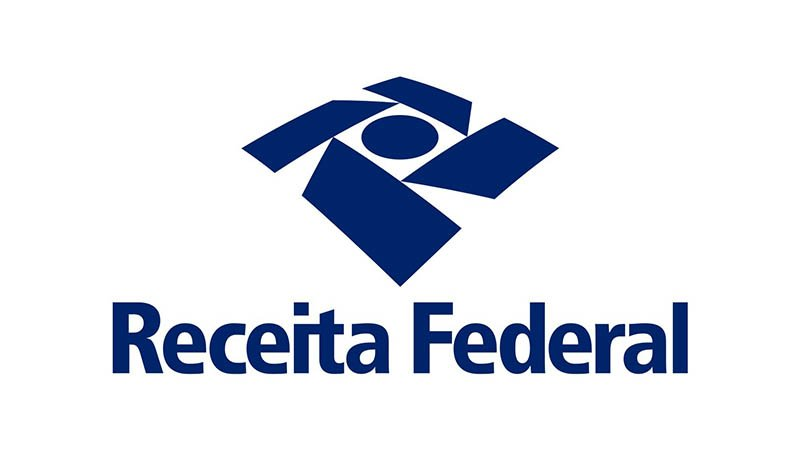

In [ ]:
from google.colab import files

# Fa√ßa o download do arquivo em https://www.gov.br/receitafederal/dados/distribuicao-renda-socios-exclusiva.csv e importe a base

uploaded = files.upload()


for filename in uploaded.keys():
    print(f'Arquivo carregado: {filename} - {uploaded[filename].decode("utf-8")}')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



**Fonte dos dados:** [https://www.gov.br/receitafederal/dados/distribuicao-renda-socios-exclusiva.csv](https://www.gov.br/receitafederal/dados/distribuicao-renda-socios-exclusiva.csv)

No trecho de c√≥digo a seguir, o arquivo CSV √© lido e convertido em um DataFrame, utilizando a biblioteca pandas, usando como delimitador o ponto-e-v√≠rgula (;). Ap√≥s a leitura, as colunas do DataFrame s√£o exibidas para fornecer uma vis√£o geral das vari√°veis dispon√≠veis, facilitando o entendimento inicial da estrutura dos dados.

In [ ]:
import pandas as pd


df = pd.read_csv('distribuicao-renda-socios-exclusiva.csv', delimiter=';')

# EXIBIR COLUNAS
print("Colunas do arquivo CSV:")
print(df.columns)




Colunas do arquivo CSV:
Index(['Ano-Calend√°rio', 'Ente Federativo', 'Centil',
       'Quantidade de Contribuintes',
       'Rendimentos Tributaveis - Limite Superior da RB2 do Centil [R$ milh√µes]',
       'Rendimentos Tributaveis - Soma da RB2 do Centil [R$ milh√µes]',
       'Rendimentos Tributaveis - RB2 Acumulada do Centil [R$ milh√µes]',
       'Rendimentos Tributaveis - M√©dia da RB2 do Centil [R$]',
       'Rendimentos Sujeitos √† Tribut. Exclusiva [R$ milh√µes]',
       'Rendimentos Isentos - Lucros e dividendos [R$ milh√µes]',
       'Rendimentos Isentos - Rendim. S√≥cio/Titular ME/EPP Opt SIMPLES [R$ milh√µes]',
       'Rendimentos Isentos - Outros Rendimentos Isentos [R$ milh√µes]',
       'Despesas Dedut√≠veis - Previd√™ncia [R$ milh√µes]',
       'Despesas Dedut√≠veis - Dependentes [R$ milh√µes]',
       'Despesas Dedut√≠veis - Instru√ß√£o [R$ milh√µes]',
       'Despesas Dedut√≠veis - M√©dicas [R$ milh√µes]',
       'Despesas Dedut√≠veis - Pens√£o Aliment√≠cia [R$ milh√µ

In [ ]:
import pandas as pd

df = pd.read_csv('distribuicao-renda-socios-exclusiva.csv', delimiter=';')

# EXIBIR QUANTIDADE DE LINHAS
print("N√∫mero de linhas no arquivo CSV:", len(df))


N√∫mero de linhas no arquivo CSV: 46350


<h1> Etapa 1 - Analise Explorat√≥ria Inicial

Primeiro teste


In [ ]:

df_rj = df[df['Ente Federativo'] == 'Rio de Janeiro'].tail(1)

print(df_rj.to_string(index=False, justify='left'))


Empty DataFrame
Columns: [Ano-Calend√°rio, Ente Federativo, Centil, Quantidade de Contribuintes, Rendimentos Tributaveis - Limite Superior da RB2 do Centil [R$ milh√µes], Rendimentos Tributaveis - Soma da RB2 do Centil [R$ milh√µes], Rendimentos Tributaveis - RB2 Acumulada do Centil [R$ milh√µes], Rendimentos Tributaveis - M√©dia da RB2 do Centil [R$], Rendimentos Sujeitos √† Tribut. Exclusiva [R$ milh√µes], Rendimentos Isentos - Lucros e dividendos [R$ milh√µes], Rendimentos Isentos - Rendim. S√≥cio/Titular ME/EPP Opt SIMPLES [R$ milh√µes], Rendimentos Isentos - Outros Rendimentos Isentos [R$ milh√µes], Despesas Dedut√≠veis - Previd√™ncia [R$ milh√µes], Despesas Dedut√≠veis - Dependentes [R$ milh√µes], Despesas Dedut√≠veis - Instru√ß√£o [R$ milh√µes], Despesas Dedut√≠veis - M√©dicas [R$ milh√µes], Despesas Dedut√≠veis - Pens√£o Aliment√≠cia [R$ milh√µes], Despesas Dedut√≠veis - Livro-Caixa [R$ milh√µes], Imposto Devido [R$ milh√µes], Bens e Direitos - Im√≥veis [R$ milh√µes], Bens e Di

<h2> Identifica√ß√£o de valores nulos <h2>

In [ ]:
print("\nQuantidade de valores nulos em cada coluna:")
print(df.isnull().sum())


Quantidade de valores nulos em cada coluna:
Ano-Calend√°rio                                                                    0
Ente Federativo                                                                   0
Centil                                                                            0
Quantidade de Contribuintes                                                       0
Rendimentos Tributaveis - Limite Superior da RB2 do Centil [R$ milh√µes]        2908
Rendimentos Tributaveis - Soma da RB2 do Centil [R$ milh√µes]                   2908
Rendimentos Tributaveis - RB2 Acumulada do Centil [R$ milh√µes]                 2908
Rendimentos Tributaveis - M√©dia da RB2 do Centil [R$]                          2908
Rendimentos Sujeitos √† Tribut. Exclusiva [R$ milh√µes]                          3065
Rendimentos Isentos - Lucros e dividendos [R$ milh√µes]                         3639
Rendimentos Isentos - Rendim. S√≥cio/Titular ME/EPP Opt SIMPLES [R$ milh√µes]    4055
Rendimentos Isentos -

<h2> Tratando os dados nulos <h2>

O trecho a seguir realiza a limpeza e a padroniza√ß√£o dos dados. Primeiro, v√≠rgulas s√£o substitu√≠das por pontos e espa√ßos em branco s√£o convertidos para valores nulos (NaN). As colunas num√©ricas s√£o ent√£o convertidas para o tipo float e os valores nulos nas colunas de rendimentos s√£o preenchidos com a mediana dessas colunas, uma t√©cnica comum para lidar com dados faltantes. Por fim, o c√≥digo verifica se ainda existem valores nulos, garantindo que os dados estejam prontos para an√°lise.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('distribuicao-renda-socios-exclusiva.csv', delimiter=';')


# REMOVENDO ESPA√áOS VAZIOS E TIRANDO VIRGULA DO FINAL
rendimento_cols = [
    'Rendimentos Tributaveis - Limite Superior da RB2 do Centil [R$ milh√µes]',
    'Rendimentos Tributaveis - Soma da RB2 do Centil [R$ milh√µes]',
    'Rendimentos Tributaveis - RB2 Acumulada do Centil [R$ milh√µes]',
    'Rendimentos Tributaveis - M√©dia da RB2 do Centil [R$]',
    'Rendimentos Sujeitos √† Tribut. Exclusiva [R$ milh√µes]',
    'Rendimentos Isentos - Lucros e dividendos [R$ milh√µes]',
    'Rendimentos Isentos - Rendim. S√≥cio/Titular ME/EPP Opt SIMPLES [R$ milh√µes]',
    'Rendimentos Isentos - Outros Rendimentos Isentos [R$ milh√µes]',
    'Despesas Dedut√≠veis - Previd√™ncia [R$ milh√µes]',
    'Despesas Dedut√≠veis - Dependentes [R$ milh√µes]',
    'Despesas Dedut√≠veis - Instru√ß√£o [R$ milh√µes]',
    'Despesas Dedut√≠veis - M√©dicas [R$ milh√µes]',
    'Despesas Dedut√≠veis - Pens√£o Aliment√≠cia [R$ milh√µes]',
    'Despesas Dedut√≠veis - Livro-Caixa [R$ milh√µes]',
    'Imposto Devido [R$ milh√µes]',
    'Bens e Direitos - Im√≥veis [R$ milh√µes]',
    'Bens e Direitos - M√≥veis [R$ milh√µes]',
    'Bens e Direitos - Financeiros [R$ milh√µes]',
    'Bens e Direitos - Outros Bens e Direitos [R$ milh√µes]',
    'D√≠vidas e √înus [R$ milh√µes]'
]
df[rendimento_cols] = df[rendimento_cols].replace('\.', '', regex=True).replace(',', '.', regex=True).replace(' ', np.nan, regex=True)

# CONVERTENDO PARA FLOAT
df[rendimento_cols] = df[rendimento_cols].astype(float)

# TROCAR VALORES NULOS PELA MEDIANA
df[rendimento_cols] = df[rendimento_cols].fillna(df[rendimento_cols].median())

# IMPRIMIR NOVAMENTE PARA VER SE AINDA EXISTEM VALORES NULOS
print("\nQuantidade de valores nulos em cada coluna ap√≥s o tratamento:")
print(df.isnull().sum())



Quantidade de valores nulos em cada coluna ap√≥s o tratamento:
Ano-Calend√°rio                                                                 0
Ente Federativo                                                                0
Centil                                                                         0
Quantidade de Contribuintes                                                    0
Rendimentos Tributaveis - Limite Superior da RB2 do Centil [R$ milh√µes]        0
Rendimentos Tributaveis - Soma da RB2 do Centil [R$ milh√µes]                   0
Rendimentos Tributaveis - RB2 Acumulada do Centil [R$ milh√µes]                 0
Rendimentos Tributaveis - M√©dia da RB2 do Centil [R$]                          0
Rendimentos Sujeitos √† Tribut. Exclusiva [R$ milh√µes]                          0
Rendimentos Isentos - Lucros e dividendos [R$ milh√µes]                         0
Rendimentos Isentos - Rendim. S√≥cio/Titular ME/EPP Opt SIMPLES [R$ milh√µes]    0
Rendimentos Isentos - Outros Rendim

Em seguida, as primeiras linhas do DataFrame s√£o exibidas para proporcionar uma visualiza√ß√£o r√°pida dos dados ap√≥s o processo de limpeza e tratamento. Isso ajuda a verificar a integridade dos dados e a confirmar que a leitura e o tratamento foram realizados corretamente.

In [ ]:

# IMPRIMIR PRIMERAS LINHAS DA BASE
print("\nPrimeiras linhas do DataFrame:")
print(df.head())




Primeiras linhas do DataFrame:
   Ano-Calend√°rio Ente Federativo Centil  Quantidade de Contribuintes  \
0            2006          BRASIL      1                      241.563   
1            2006          BRASIL      2                      241.563   
2            2006          BRASIL      3                      241.562   
3            2006          BRASIL      4                      241.563   
4            2006          BRASIL      5                      241.562   

   Rendimentos Tributaveis - Limite Superior da RB2 do Centil [R$ milh√µes]  \
0                                          39784.355                         
1                                          39784.355                         
2                                          39784.355                         
3                                          39784.355                         
4                                          39784.355                         

   Rendimentos Tributaveis - Soma da RB2 do Centil [R$ mil

<h1> Etapa 2 - An√°lise Descritiva dos Dados

Neste trecho, s√£o calculadas estat√≠sticas descritivas fundamentais dos rendimentos tribut√°veis: m√©dia, mediana e desvio padr√£o. Estas se√ß√µes do c√≥digo, quando combinadas, fornecem uma base s√≥lida para a an√°lise detalhada dos dados tribut√°rios e de rendimentos, preparando os dados para an√°lises mais avan√ßadas e visualiza√ß√µes subsequentes.


In [ ]:
# MEDIA DOS RENDIMENTOS
media = df['Rendimentos Tributaveis - M√©dia da RB2 do Centil [R$]'].mean()

# MEDIANA
mediana = df['Rendimentos Tributaveis - M√©dia da RB2 do Centil [R$]'].median()

# DESVIO PADR√ÉO
desvio_padrao = df['Rendimentos Tributaveis - M√©dia da RB2 do Centil [R$]'].std()

print(f"M√©dia dos rendimentos tribut√°veis: {media:.2f}")
print(f"Mediana dos rendimentos tribut√°veis: {mediana:.2f}")
print(f"Desvio padr√£o dos rendimentos tribut√°veis: {desvio_padrao:.2f}")


M√©dia dos rendimentos tribut√°veis: 156654.87
Mediana dos rendimentos tribut√°veis: 39351.92
Desvio padr√£o dos rendimentos tribut√°veis: 759566.44


<p> An√°lise de quais estados rendem mais <p>

In [ ]:
import pandas as pd

# EXCLUIR "BRASIL" DA LISTA DE ENTES FEDERATIVOS
df_estados = df[df['Ente Federativo'] != 'BRASIL']

# CALCULAR RENDIMENTOS POR ESTADO
rendimentos_por_estado = df_estados.groupby('Ente Federativo')['Rendimentos Tributaveis - Soma da RB2 do Centil [R$ milh√µes]'].sum()
# Arrecada√ß√£o de impostos
# Filtrar limite m√≠nimo para os rendimentos tribut√°veis somados por estado.---> 5K COMO EXEMPLO
estados_filtrados = rendimentos_por_estado[rendimentos_por_estado > 5000]

# CRIAR DATAFRAME COM DADOS FILTRADOS
df_tabela = pd.DataFrame({'Estado': estados_filtrados.index, 'Rendimentos (em milh√µes de R$)': estados_filtrados.values})

# ORDENAR POR RENDIMENTOS
df_tabela = df_tabela.sort_values(by='Rendimentos (em milh√µes de R$)', ascending=False)


print(df_tabela)


   Estado  Rendimentos (em milh√µes de R$)
25     SP                     11344363.86
18     RJ                      3866835.72
10     MG                      2618693.05
22     RS                      2103635.41
17     PR                      1858375.53
23     SC                      1209644.29
6      DF                      1065304.46
4      BA                      1006538.38
8      GO                       791503.28
15     PE                       775024.60
5      CE                       589112.95
7      ES                       515087.25
13     PA                       460600.18
12     MT                       417027.99
11     MS                       368752.47
2      AM                       322842.94
9      MA                       307997.33
19     RN                       295402.82
14     PB                       266473.86
1      AL                       213749.38
24     SE                       204875.82
16     PI                       196102.46
20     RO                       1

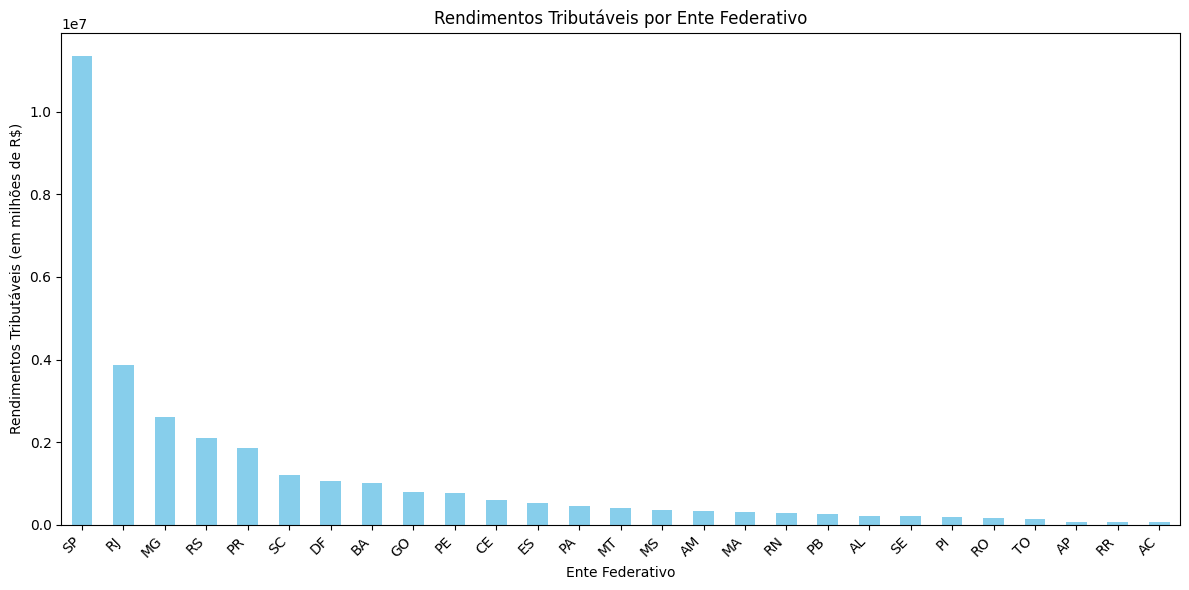

In [ ]:
import matplotlib.pyplot as plt

# EXCLUIR "BRASIL" DA LISTA DE ENTES FEDERATIVOS
df_estados = df[df['Ente Federativo'] != 'BRASIL']


rendimentos_por_estado = df_estados.groupby('Ente Federativo')['Rendimentos Tributaveis - Soma da RB2 do Centil [R$ milh√µes]'].sum()


estados_filtrados = rendimentos_por_estado[rendimentos_por_estado > 5000].index


rendimentos_ordenados = rendimentos_por_estado.loc[estados_filtrados].sort_values(ascending=False).index

# CRIANDO GRAFICO DE BARRAS
plt.figure(figsize=(12, 6))
rendimentos_por_estado.loc[rendimentos_ordenados].plot(kind='bar', color='skyblue')
plt.title('Rendimentos Tribut√°veis por Ente Federativo')
plt.xlabel('Ente Federativo')
plt.ylabel('Rendimentos Tribut√°veis (em milh√µes de R$)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()




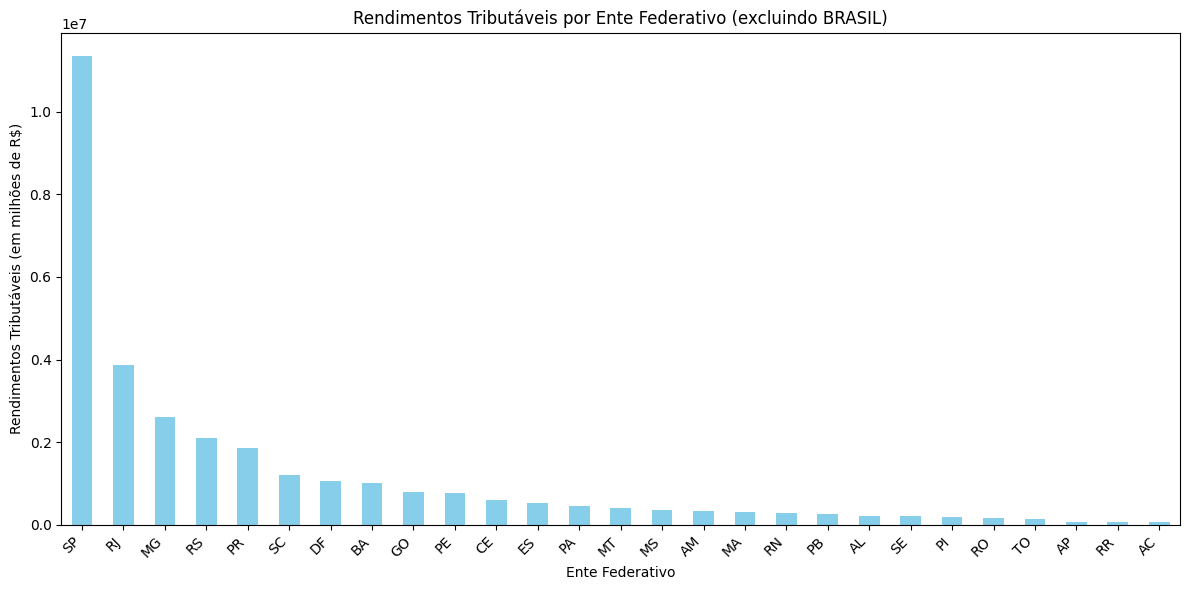

In [ ]:
import matplotlib.pyplot as plt
#  EXCLUINDO BRASIL DA CONSULTA

df_estados = df[df['Ente Federativo'] != 'BRASIL']

# SOMA DE RENDIMENTOS TRIBUTAVEIS POR ESTADO
rendimentos_por_estado = df_estados.groupby('Ente Federativo')['Rendimentos Tributaveis - Soma da RB2 do Centil [R$ milh√µes]'].sum()


rendimentos_por_estado = rendimentos_por_estado.sort_values(ascending=False)


plt.figure(figsize=(12, 6))
rendimentos_por_estado.plot(kind='bar', color='skyblue')
plt.title('Rendimentos Tribut√°veis por Ente Federativo (excluindo BRASIL)')
plt.xlabel('Ente Federativo')
plt.ylabel('Rendimentos Tribut√°veis (em milh√µes de R$)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()




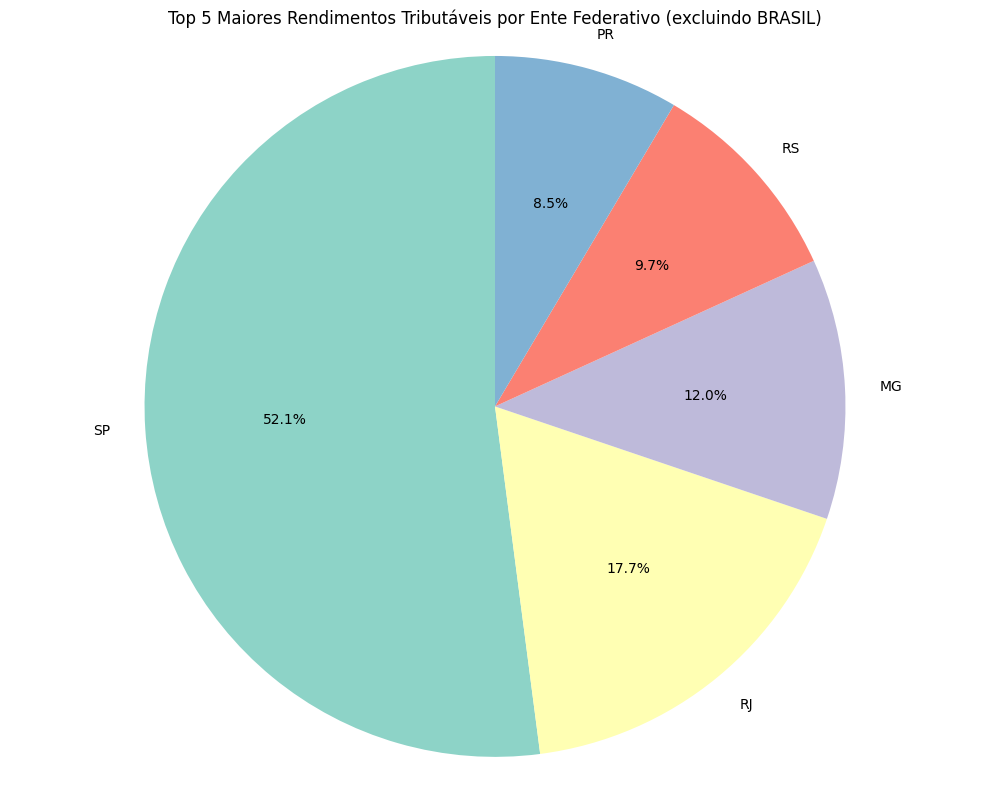

In [ ]:
top5_rendimentos = rendimentos_por_estado.nlargest(5)

plt.figure(figsize=(10, 8))
plt.pie(top5_rendimentos, labels=top5_rendimentos.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Top 5 Maiores Rendimentos Tribut√°veis por Ente Federativo (excluindo BRASIL)')

plt.tight_layout()
plt.show()



In [ ]:
df.columns

Index(['Ano-Calend√°rio', 'Ente Federativo', 'Centil',
       'Quantidade de Contribuintes',
       'Rendimentos Tributaveis - Limite Superior da RB2 do Centil [R$ milh√µes]',
       'Rendimentos Tributaveis - Soma da RB2 do Centil [R$ milh√µes]',
       'Rendimentos Tributaveis - RB2 Acumulada do Centil [R$ milh√µes]',
       'Rendimentos Tributaveis - M√©dia da RB2 do Centil [R$]',
       'Rendimentos Sujeitos √† Tribut. Exclusiva [R$ milh√µes]',
       'Rendimentos Isentos - Lucros e dividendos [R$ milh√µes]',
       'Rendimentos Isentos - Rendim. S√≥cio/Titular ME/EPP Opt SIMPLES [R$ milh√µes]',
       'Rendimentos Isentos - Outros Rendimentos Isentos [R$ milh√µes]',
       'Despesas Dedut√≠veis - Previd√™ncia [R$ milh√µes]',
       'Despesas Dedut√≠veis - Dependentes [R$ milh√µes]',
       'Despesas Dedut√≠veis - Instru√ß√£o [R$ milh√µes]',
       'Despesas Dedut√≠veis - M√©dicas [R$ milh√µes]',
       'Despesas Dedut√≠veis - Pens√£o Aliment√≠cia [R$ milh√µes]',
       'Despesas D

<h1> D√≠vida Total por Ente Federativo

   Ente Federativo  D√≠vida Total (R$ milh√µes)
0               SP                 3381331.51
1               RJ                  965824.42
2               MG                  739057.18
3               PR                  606387.96
4               RS                  575872.94
5               GO                  382440.29
6               SC                  369022.22
7               BA                  331094.78
8               DF                  252213.62
9               MT                  207502.91
10              ES                  193946.28
11              PE                  178746.02
12              MS                  139085.27
13              CE                  123087.03
14              TO                  104629.81
15              SE                  104310.28
16              PA                   66957.75
17              RN                   51238.98
18              AM                   48054.64
19              PB                   47881.59
20              MA              

<ipython-input-92-1eba3970aea7>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ente Federativo', y='D√≠vida Total (R$ milh√µes)', data=tabela_divida, palette='viridis')


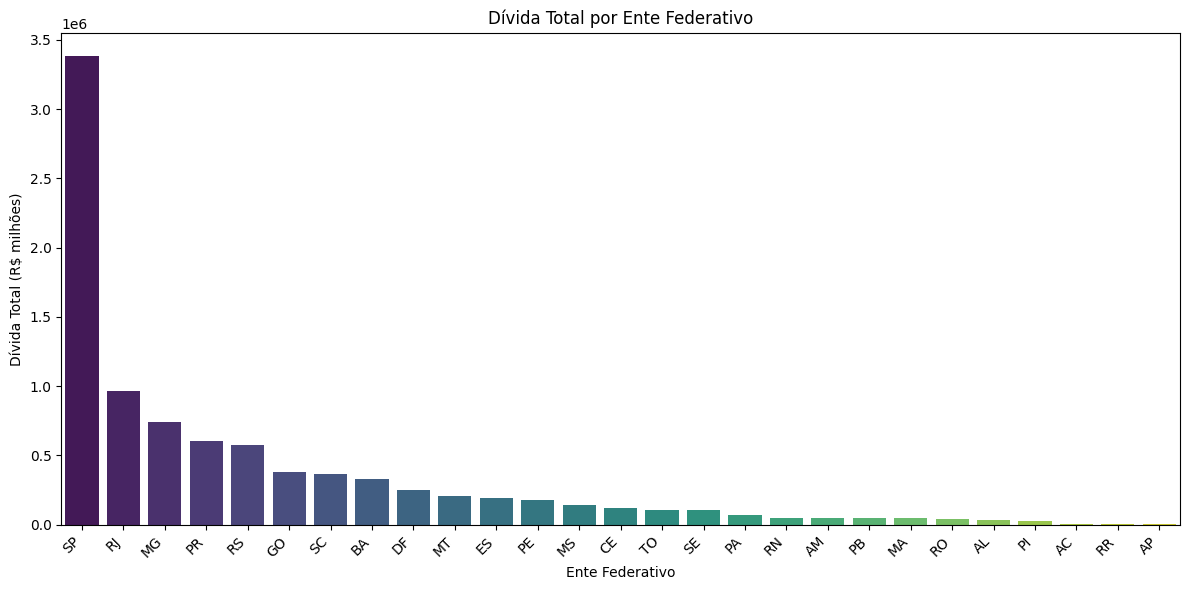

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv('distribuicao-renda-socios-exclusiva.csv', delimiter=';')

# Identificar colunas num√©ricas e de string
numeric_cols = df.columns[3:]

# TROCAR VIRGULA POR PONTO, REMOVER ESPA√áOS  e E SUBSTITUIR VAZIOS POR NAN
for col in numeric_cols:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace('.', '').str.replace(',', '.').str.strip()
        df[col] = df[col].replace('', np.nan).astype(float)

df_estados = df[df['Ente Federativo'] != 'BRASIL']


divida_por_ente = df_estados.groupby('Ente Federativo')['D√≠vidas e √înus [R$ milh√µes]'].sum()

# ORDENANDO ESTADOS POR DIVIDA
divida_por_ente = divida_por_ente.sort_values(ascending=False)

# TABELA COM MAIORES DIVIDAS
tabela_divida = divida_por_ente.reset_index().rename(columns={'D√≠vidas e √înus [R$ milh√µes]': 'D√≠vida Total (R$ milh√µes)'})
print(tabela_divida)


plt.figure(figsize=(12, 6))
sns.barplot(x='Ente Federativo', y='D√≠vida Total (R$ milh√µes)', data=tabela_divida, palette='viridis')
plt.title('D√≠vida Total por Ente Federativo')
plt.xlabel('Ente Federativo')
plt.ylabel('D√≠vida Total (R$ milh√µes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()




√â poss√≠vel concluir que a d√≠vida tribut√°ria, apesar de n√£o superar os rendimentos, chega a valores discrepantes. Os estados com maior rendimento tamb√©m s√£o os que possuem maior d√≠vida.

<h1>An√°lise de Frequ√™ncia

In [ ]:
df = pd.read_csv('distribuicao-renda-socios-exclusiva.csv', delimiter=';')

value_counts = df['Rendimentos Tributaveis - Limite Superior da RB2 do Centil [R$ milh√µes]'].value_counts()
print(value_counts)


Rendimentos Tributaveis - Limite Superior da RB2 do Centil [R$ milh√µes]
24.000,00       253
18.000,00       247
12.000,00       196
21.600,00        97
14.400,00        94
               ... 
25.262,07         1
24.825,70         1
23.751,20         1
23.492,02         1
1.566.851,34      1
Name: count, Length: 37739, dtype: int64


<h1> Rendimentos Isentos de Tributac√£o <h1>
<p> Rendimentos isentos s√£o aqueles que, por defini√ß√£o legal, n√£o est√£o sujeitos √† tributa√ß√£o pelo Imposto de Renda. A isen√ß√£o pode ocorrer por diversas raz√µes, incluindo pol√≠ticas governamentais para incentivar certos comportamentos econ√¥micos, evitar a dupla tributa√ß√£o ou proteger rendas de menor valor.<p>

<p> O gr√°fico mostra as principais fontes n√£o tribut√°veis de renda presentes na base <p>

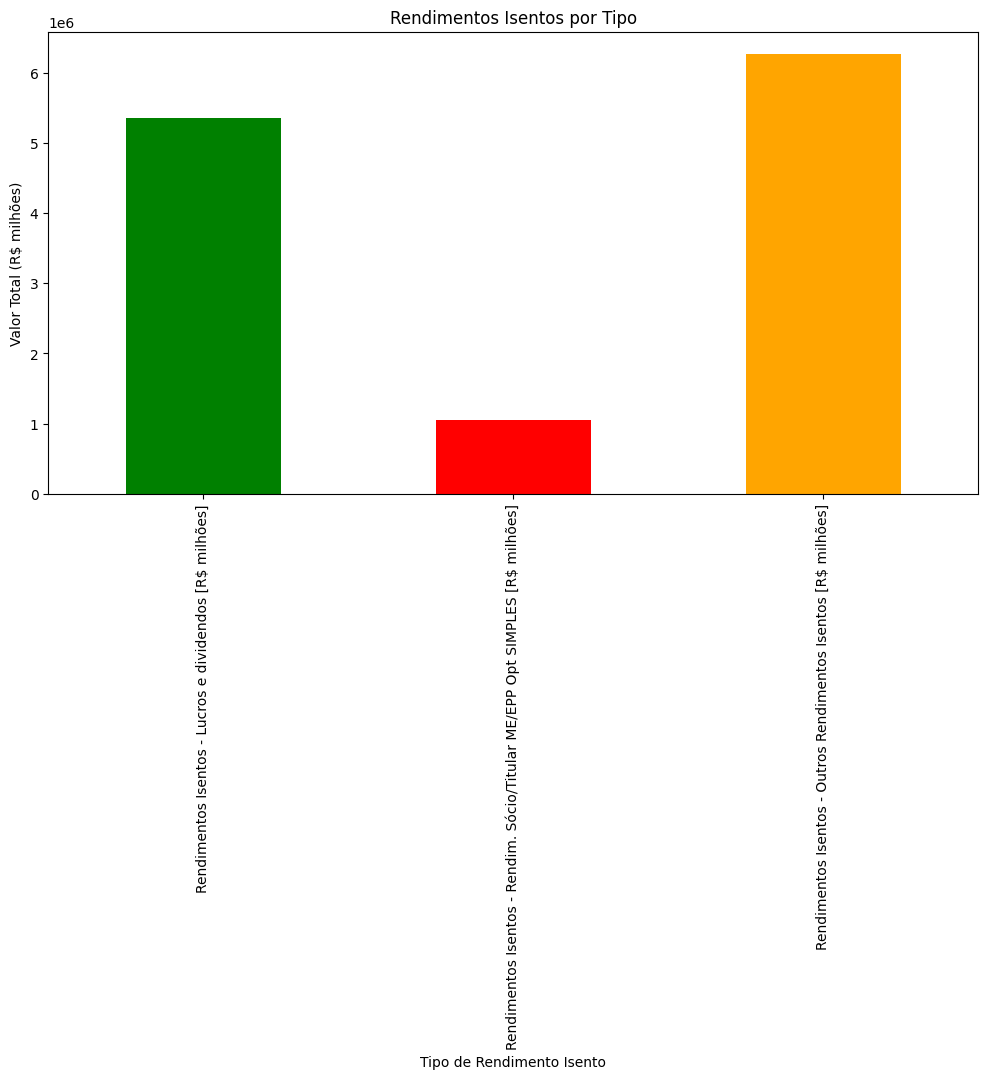

In [ ]:

plt.figure(figsize=(12, 6))
rendimentos_isentos = df_estados[['Rendimentos Isentos - Lucros e dividendos [R$ milh√µes]',
                                  'Rendimentos Isentos - Rendim. S√≥cio/Titular ME/EPP Opt SIMPLES [R$ milh√µes]',
                                  'Rendimentos Isentos - Outros Rendimentos Isentos [R$ milh√µes]']].sum()
rendimentos_isentos.plot(kind='bar', color=['green', 'red', 'orange'])
plt.title('Rendimentos Isentos por Tipo')
plt.xlabel('Tipo de Rendimento Isento')
plt.ylabel('Valor Total (R$ milh√µes)')
plt.show()


<h1> Regress√£o Linear <h1>

<h2>  Os dados s√£o divididos em vari√°veis de entrada (X) e vari√°vel alvo (y). Neste caso, a vari√°vel de entrada √© a coluna 'Rendimentos Tribut√°veis' e a vari√°vel alvo √© a coluna 'Imposto Devido'. Al√©m disso, os dados s√£o divididos em conjuntos de treinamento e teste utilizando a fun√ß√£o train_test_split()<h2>

Debt = Œ≤0 + Œ≤1*Income + Œµ

Este √© o modelo de regress√£o linear que estamos utilizando para analisar a rela√ß√£o entre a d√≠vida e a renda dos estados brasileiros.O modelo assume que a rela√ß√£o entre a d√≠vida e a renda √© linear, ou seja, que a d√≠vida aumenta ou diminui em uma taxa constante para cada unidade de mudan√ßa na renda.

O objetivo da an√°lise de regress√£o linear √© estimar os valores que melhor se ajustam aos dados, de forma que o modelo possa ser utilizado para fazer previs√µes sobre a d√≠vida com base na renda.


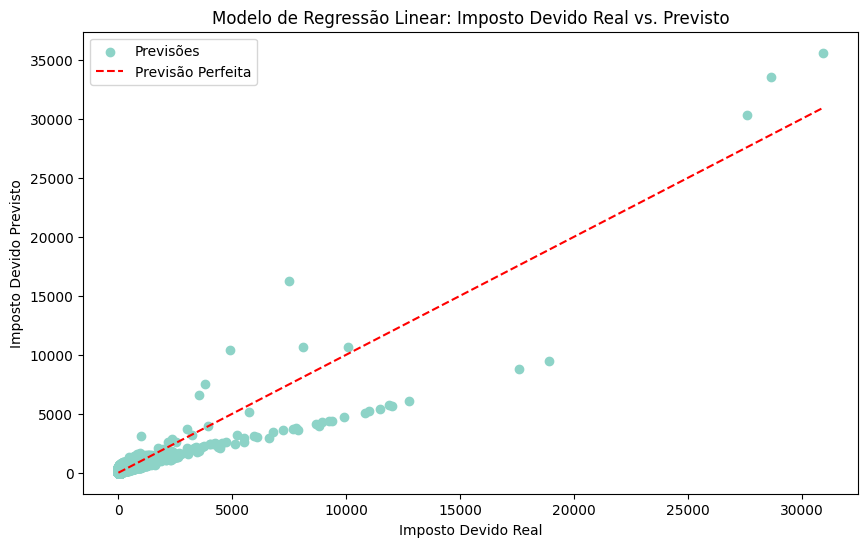

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer # --------> tratar dados NaN

file_path = 'distribuicao-renda-socios-exclusiva.csv'
df = pd.read_csv(file_path, delimiter=';')

# convertendo pra float e trocando , por .
numeric_cols = ['Rendimentos Tributaveis - Soma da RB2 do Centil [R$ milh√µes]', 'Imposto Devido [R$ milh√µes]']
for col in numeric_cols:
    df[col] = df[col].str.replace('.', '').str.replace(',', '.').str.strip()
    df[col] = df[col].replace('', np.nan).astype(float)

# trocando NaN pela m√©dia da coluna
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# SEPARAR OS DADOS DE ENTRADA EM X E Y
X = df[['Rendimentos Tributaveis - Soma da RB2 do Centil [R$ milh√µes]']]
y = df['Imposto Devido [R$ milh√µes]']

# Dividindo os dados em TREINAMENTO E TESTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# CRIANDO E TREINANDO O MODELO
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
#CRIANDO GRAFICO PREDITIVO
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, label='Previs√µes')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', label='Previs√£o Perfeita')
plt.xlabel('Imposto Devido Real')
plt.ylabel('Imposto Devido Previsto')
plt.title('Modelo de Regress√£o Linear: Imposto Devido Real vs. Previsto')
plt.legend()
plt.show()


A f√≥rmula utiliada √©:

y=b
0
‚Äã
 +b
1
‚Äã
 ‚ãÖx

onde:


y √© a vari√°vel dependente que queremos prever,

x √© a vari√°vel independente que usamos para fazer a previs√£o,



b
0
‚Äã
  √© o intercepto da linha (o valor de
ùë¶
y quando
ùë•
=
0
x=0),



b
1
‚Äã
  √© a inclina√ß√£o da linha (a mudan√ßa em
ùë¶
y para uma unidade de mudan√ßa em
ùë•
x).

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

file_path = 'distribuicao-renda-socios-exclusiva.csv'
df = pd.read_csv(file_path, delimiter=';')

# convertendo pra float e trocando , por .
numeric_cols = ['Rendimentos Tributaveis - Soma da RB2 do Centil [R$ milh√µes]', 'Imposto Devido [R$ milh√µes]']
for col in numeric_cols:
    df[col] = df[col].str.replace('.', '').str.replace(',', '.').str.strip()
    df[col] = df[col].replace('', np.nan).astype(float)

# trocando NaN pela m√©dia da coluna
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# SEPARAR OS DADOS DE ENTRADA EM X E Y
X = df[['Rendimentos Tributaveis - Soma da RB2 do Centil [R$ milh√µes]']]
y = df['Imposto Devido [R$ milh√µes]']

# Dividindo os dados em TREINAMENTO E TESTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# CRIANDO E TREINANDO O MODELO
model = LinearRegression()
model.fit(X_train, y_train)

# Imprimir os resultados
print("Coeficientes:")
print(f"Œ≤0 (intercepto): {model.intercept_:.2f} (milh√µes de reais)")
print(f"Œ≤1 (coeficiente de inclina√ß√£o): {model.coef_[0]:.2f}")
print("")
print("Estat√≠sticas:")
print(f"R-quadrado (R¬≤): {model.score(X_test, y_test):.2f}")


Coeficientes:
Œ≤0 (intercepto): 15.63 (milh√µes de reais)
Œ≤1 (coeficiente de inclina√ß√£o): 0.06

Estat√≠sticas:
R-quadrado (R¬≤): 0.83


Com um intercepto de 15.63 milh√µes de reais e um coeficiente de inclina√ß√£o de 0.06, podemos interpretar que este modelo de regress√£o linear prev√™ que y aumenta em 0.06 milh√µes de reais para cada unidade adicional de x. O valor do intercepto indica o valor esperado de y quando x √© zero.

Al√©m disso, o valor alto de R 2 (0.83) sugere que a maioria da varia√ß√£o em y pode ser explicada pelas mudan√ßas em x.

<h1> CLUSTERIZANDO OS DADOS <h1>

<p> Para facilitar a an√°lise, clusterizamos os dados em 3 clusters, onde o Cluster 0 tem a menor m√©dia de Rendimentos Tribut√°veis e Imposto Devido, indicando empresas ou indiv√≠duos com menor renda e, consequentemente, menor imposto a ser pago<p> o Cluster 1 tem a maior m√©dia de Rendimentos Tribut√°veis e Imposto Devido, sugerindo empresas ou indiv√≠duos com maior renda e, portanto, pagando mais impostos. O Cluster 2 est√° entre os dois primeiros clusters em termos de Rendimentos Tribut√°veis e Imposto Devido, representando uma faixa intermedi√°ria de renda e impostos. <p>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


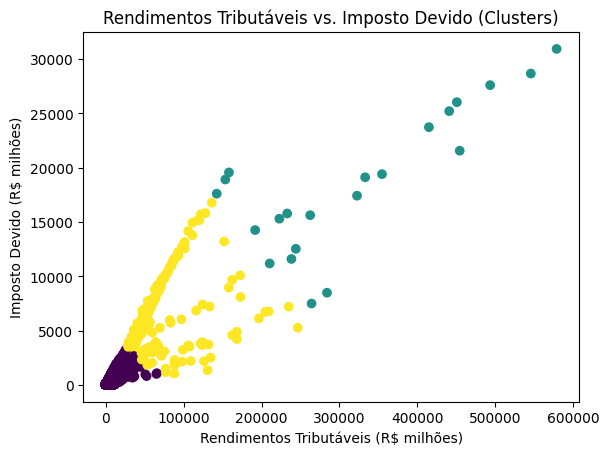

In [ ]:
# PADRONIZANDO
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numeric_cols])

# UTILIZANDO K MEANS PARA AGRUPAR OS DADOS EM 3 CLUSTERS
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)


plt.scatter(df['Rendimentos Tributaveis - Soma da RB2 do Centil [R$ milh√µes]'], df['Imposto Devido [R$ milh√µes]'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Rendimentos Tribut√°veis (R$ milh√µes)')
plt.ylabel('Imposto Devido (R$ milh√µes)')
plt.title('Rendimentos Tribut√°veis vs. Imposto Devido (Clusters)')
plt.show()


Essa tabela mostra algumas estat√≠sticas para cada cluster:

Rendimentos Tribut√°veis (m√©dia):

Cluster 0: R$ 1032,41 milh√µes
Cluster 1: R$ 317884,56 milh√µes
Cluster 2: R$ 65086,14 milh√µes
Imposto Devido (m√©dia):

Cluster 0: R$ 71,68 milh√µes
Cluster 1: R$ 18544,61 milh√µes
Cluster 2: R$ 5719,58 milh√µes

In [ ]:
cluster_status = df.groupby('Cluster')[numeric_cols].agg(['mean', 'std', 'count']).round(2)
print(cluster_status)


        Rendimentos Tributaveis - Soma da RB2 do Centil [R$ milh√µes]  \
                                                                mean   
Cluster                                                                
0                                                  1032.41             
1                                                317884.56             
2                                                 65086.14             

                          Imposto Devido [R$ milh√µes]                  
               std  count                        mean      std  count  
Cluster                                                                
0          2911.99  46084                       71.68   208.42  46084  
1        130731.95     22                    18544.61  6493.82     22  
2         39254.67    244                     5719.58  3139.32    244  


<h2>Essa tabela mostra algumas estat√≠sticas para cada cluster:

Rendimentos Tribut√°veis (m√©dia): Cluster 0 -  1032,41 milh√µes; Cluster 1 -  317884,56 milh√µes; Cluster 2 -  65086,14 milh√µes


Imposto Devido (m√©dia):
 Cluster 0 -  71,68 milh√µes; Cluster 1 -  18544,61 milh√µes; Cluster 2 -  5719,58 milh√µes



<h2>